# Loan Application Status Prediction

Problem Statement:

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Import our Data Set

In [2]:
data=pd.read_csv('loan_prediction.csv')

In [3]:
#our Data Set
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
# Let Us check the data shape or dimention
data.shape

(614, 13)

So we have a total of 614 coloumns and 13 rows

In [5]:
# Lte us check the infromation about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


As we find the information about the data we can identify that few features 'null' value is present, and 8 object type data type and 5 numerical type data types were available

In [6]:
# We can confirm the same by using dtype function
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
#Now let us check the that value count of data
data.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

While looking thsi we can identify that there are 7 catatogorical features are presnet, Loan_id have 614 different data so we can remove that from our data

In [8]:
data.drop('Loan_ID',axis=1,inplace=True)

In [9]:
# Let check each values of features in  our data
for i in data.columns:
        print(data[i].value_counts())
        print('****************************************')

Male      489
Female    112
Name: Gender, dtype: int64
****************************************
Yes    398
No     213
Name: Married, dtype: int64
****************************************
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
****************************************
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
****************************************
No     500
Yes     82
Name: Self_Employed, dtype: int64
****************************************
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64
****************************************
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64
****************************************
120.0    20
110.0    17
100.0    15
160.0    12

These are our values of our data, from this we can notice that our Label Loan_Status need sampling to make it equal

In [10]:
# Checking null values in the dataframe
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

As we noticed that there arre so many null values are present so we need to remove the same we can use imputing techniques


<AxesSubplot:>

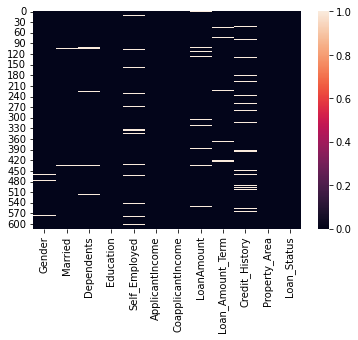

In [11]:
# lets visualize the null value
sns.heatmap(data.isnull())

So we can replace Gender, Married, Dependents,Self_employed  with mode,or mean values
For loan amount we will repalce by knimputer or iterative imputers

In [12]:
# Filling the missing values in Gender by its mode
data["Gender"] = data["Gender"].fillna(data["Gender"].mode()[0])

# Filling the missing values in Married by its mode
data["Married"] = data["Married"].fillna(data["Married"].mode()[0])

# Filling the missing values  by its mode 
data["Dependents"] = data["Dependents"].fillna(data["Dependents"].mode()[0])

# Filling the missing values  by its mode
data["Self_Employed"] = data["Self_Employed"].fillna(data["Self_Employed"].mode()[0])

# Filling the missing values  by its mode
data["Credit_History"] = data["Credit_History"].fillna(data["Credit_History"].mode()[0])


So we removed the values of all catagorical columns with mode value

In [13]:
# Now we have Loanamount and Loan amount term with us to remove null values
data.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
# Let us replace null values in LoamAmount by iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [15]:
impute=IterativeImputer()
df1=pd.DataFrame(impute.fit_transform(data[['ApplicantIncome','LoanAmount']]),columns=['ApplicationIncome','LoanAmount'])
df1

,ApplicationIncome,LoanAmount
0,5849.0,149.925313
1,4583.0,128.000000
2,3000.0,66.000000
3,2583.0,120.000000
4,6000.0,141.000000
...,...,...
609,2900.0,71.000000
610,4106.0,40.000000
611,8072.0,253.000000
612,7583.0,187.000000


We have replaced the null values in Loan amount.

In [16]:
# Now replacce the values of our data with this imputed values
data['LoanAmount']=df1['LoanAmount']

In [17]:
# Now we have one more coloumn to replace ie Loam Amount Term that we will replace iwth Knn imputer
from sklearn.impute import KNNImputer
knnimp=KNNImputer(n_neighbors=3)
df2=pd.DataFrame(knnimp.fit_transform(data[['LoanAmount','Loan_Amount_Term']]),columns=['LoanAmount','Loan_Amount_Term'])
df2

,LoanAmount,Loan_Amount_Term
0,149.925313,360.0
1,128.000000,360.0
2,66.000000,360.0
3,120.000000,360.0
4,141.000000,360.0
...,...,...
609,71.000000,360.0
610,40.000000,180.0
611,253.000000,360.0
612,187.000000,360.0


In [18]:
df2['Loan_Amount_Term'].value_counts()

360.0    521
180.0     44
300.0     16
480.0     15
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
320.0      1
340.0      1
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [19]:
#Now we will replace the values in or data 
data['Loan_Amount_Term']=df2['Loan_Amount_Term']

<AxesSubplot:>

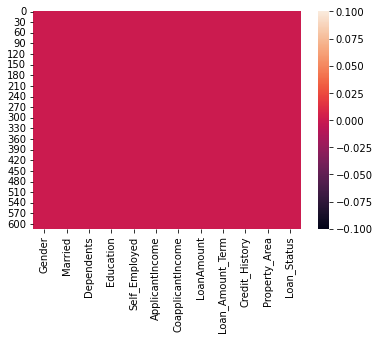

In [20]:
sns.heatmap(data.isnull())

From this we can identify that there is  no null values present in our data

In [21]:
# Checking wheather the dataset contains any space
data.loc[data['Loan_Status']==" "]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


No spaces are avalable in our Label

In [22]:
# Now check any duplicate recaord avaliable in data and drop the same
data.drop_duplicates(inplace=True)

In [23]:
# check whether any data is lost
data.shape

(614, 12)

This means no duplicate values are present in our data

In [24]:
# Statistical summary of dataset
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.405488,342.019544,0.855049
std,6109.041673,2926.248369,84.292642,64.482578,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,165.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


This gives the statistical information of the dataset. The summary of this dataset looks perfect since there is no negative/ invalid values present. It gives the summary of numerical data

The counts of all the columns are same which means there are no more  null values present in the dataset.
The mean value is greater than the median(50%) in ApplicantIncome, CoapplicantIncome, LoanAmount which means they are skewed to right.
The median is greater than the mean in Loan_Amount_Term and Credit_History which means they are skewed to left.
There is a huge difference between mean and the standard deviation.
In summarizing the data we can infer that there is a huge difference in max and 75% percentile means there are huge outliers present in the dataset. We will remove htese outliers using Zscore or IQR method in later part.


# Data Visualization

In [75]:
# checking for categorical columns
categorical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [76]:
# Now checking for numerical columns
numerical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


Y    422
N    192
Name: Loan_Status, dtype: int64


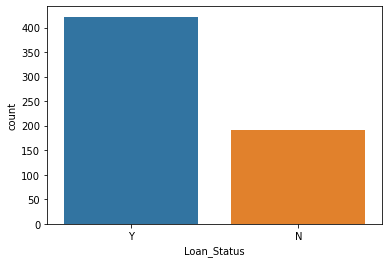

In [25]:
# Visualizing the loan approval status
print(data["Loan_Status"].value_counts())
sns.countplot(data["Loan_Status"])
plt.show()

As we earlier noticed huge differance between values in Label so we need sampling technigues to remove this differance

Male      502
Female    112
Name: Gender, dtype: int64


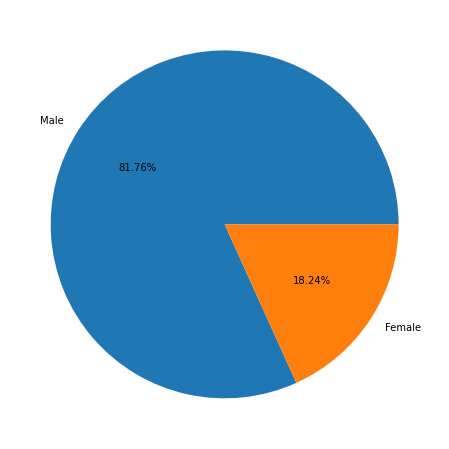

In [26]:
#Visualize the count of applicants Gender
print(data["Gender"].value_counts())
labels='Male','Female'
fig, ax = plt.subplots(figsize=(10,8))
ax.pie(data['Gender'].value_counts(), labels=labels, autopct='%1.2f%%')
plt.show()

Most of the males were applying for loans

Yes    401
No     213
Name: Married, dtype: int64


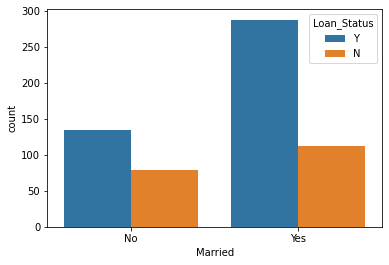

In [27]:
#Married couples and  and Loan Status
print(data["Married"].value_counts())
sns.countplot(data["Married"],hue=data['Loan_Status'])
plt.show()

For most of the married couple loan requiremnet is high and percentage of sanctioning is also high

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


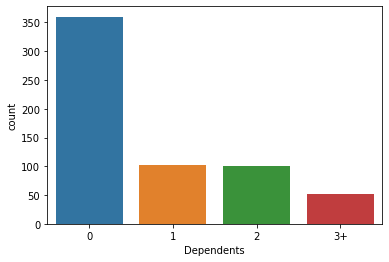

In [28]:
# Visualizing the count of Dependents 
print(data["Dependents"].value_counts())
sns.countplot(data["Dependents"])
plt.show()

This shows that zero dependant people were applying more, and we can replace 3+ with some value

In [29]:
# Replacing 3+ with 4 
data.Dependents=data.Dependents.replace(to_replace='3+', value=4)

0    360
1    102
2    101
4     51
Name: Dependents, dtype: int64


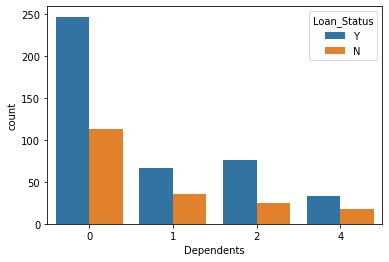

In [30]:
print(data["Dependents"].value_counts())
sns.countplot(data["Dependents"],hue=data['Loan_Status'])
plt.show()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


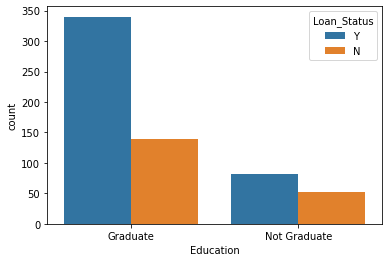

In [31]:
# Visualizing the count of Education of the applicants  and Loan Status
print(data["Education"].value_counts())
sns.countplot(data["Education"],hue=data['Loan_Status'])
plt.show()

For most of the gruaduate peoples the loan is getting sanctioned and non graguate people rejection status is high

No     532
Yes     82
Name: Self_Employed, dtype: int64


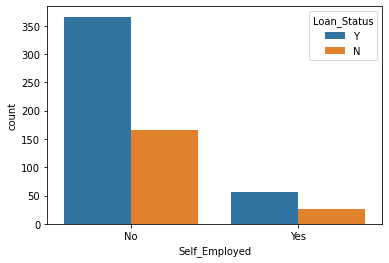

In [32]:
# Visualizing the count of Self_Employed applicants and Loan Status
print(data["Self_Employed"].value_counts())
sns.countplot(data["Self_Employed"],hue=data['Loan_Status'])
plt.show()

 Non self employed peoples were appliying loan more means may be salaried persons, and the sanction rate is alos high, for self emplyed person sanction rate is low

1.0    525
0.0     89
Name: Credit_History, dtype: int64


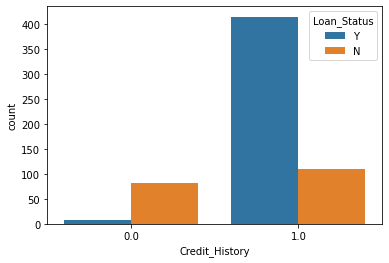

In [33]:
# Visualizing the count of Credit_History of the applicants and Loan Status
print(data["Credit_History"].value_counts())
sns.countplot(data["Credit_History"],hue=data['Loan_Status'])
plt.show()


Peoples having credit history the loan sanctioning rate is too high, and non credit history peoples the rejection in high

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


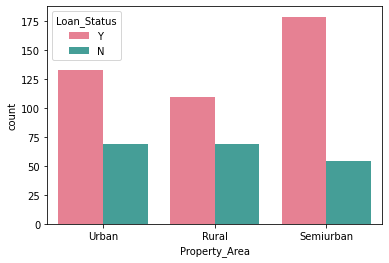

In [34]:
#Visualizing Property_Area of the applicants and loan status
print(data["Property_Area"].value_counts())
sns.countplot(data["Property_Area"],hue=data["Loan_Status"],palette="husl")
plt.show()

For all area is property is pleged loan sanctioning rate is high

Male      502
Female    112
Name: Gender, dtype: int64


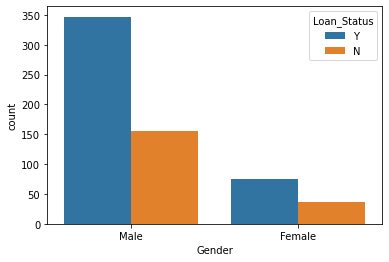

In [35]:
#Visualizing Gender of the applicants and loan Status
print(data["Gender"].value_counts())
sns.countplot(data["Gender"],hue=data["Loan_Status"])
plt.show()

As we noticed earlier number of Male applicatns is high and female applicants is low the sanctioned percentage is also low

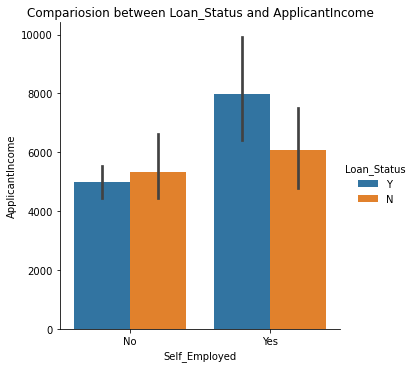

In [36]:
# Cheking relation between Self_Employed and ApplicantIncome
sns.catplot(x='Self_Employed',y="ApplicantIncome",data=data,kind="bar",hue='Loan_Status')
plt.title("Compariosion between Loan_Status and ApplicantIncome")
plt.show()

Self employed peoples with high salary the loan sanctioned percentage is high, for low income catagory the percentage of rejection is high

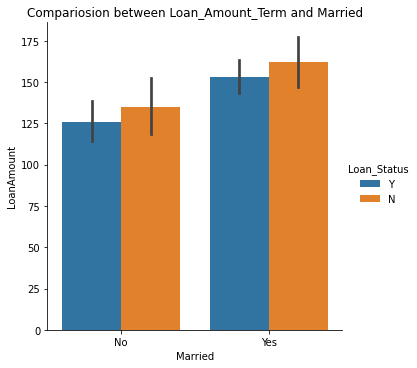

In [37]:
# Checking relation between LoanAmount and Married on the basis of target
sns.catplot(x="Married",y='LoanAmount',data=data,kind="bar",hue="Loan_Status")
plt.title("Compariosion between Loan_Amount_Term and Married")
plt.show()

For both married and non married couples for high amount of loan applications were rejected, 

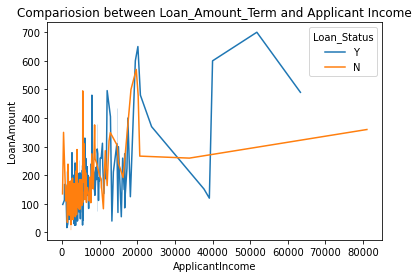

In [38]:
# Checking relation between LoanAmount and Applicant income
sns.lineplot(x="ApplicantIncome",y='LoanAmount',data=data,hue='Loan_Status')
plt.title("Compariosion between Loan_Amount_Term and Applicant Income")
plt.show()

As income increase loan applying amount is also increasing and sanctioning persentage also depend on income

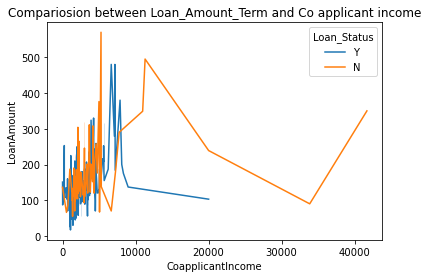

In [39]:
# Checking relation between LoanAmount and CoApplincant income
sns.lineplot(x="CoapplicantIncome",y='LoanAmount',data=data,hue='Loan_Status')
plt.title("Compariosion between Loan_Amount_Term and Co applicant income")
plt.show()

If co applicant income is high the chances of rejection is high, 

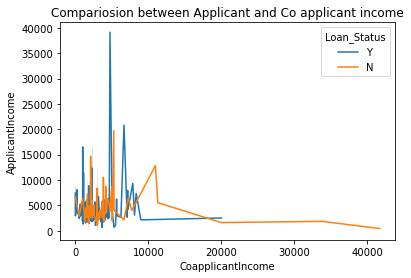

In [40]:
#let us plot Applicant income and co applicant income 
sns.lineplot(x="CoapplicantIncome",y='ApplicantIncome',data=data,hue='Loan_Status')
plt.title("Compariosion between Applicant and Co applicant income")
plt.show()

As we notice if applicant income is high the loan sanctioning is high, if co applicant income is high rejection is high

<AxesSubplot:xlabel='LoanAmount', ylabel='Loan_Amount_Term'>

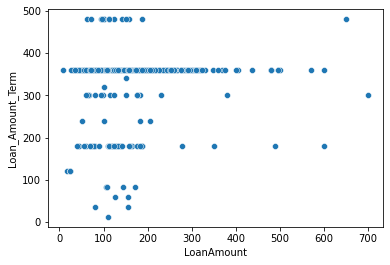

In [41]:
#Let find the relation between loan amount and Loan term
sns.scatterplot(x='LoanAmount',y='Loan_Amount_Term',data=data)

There is no linear relation between LoanAmount and Loam_Amount_Term,

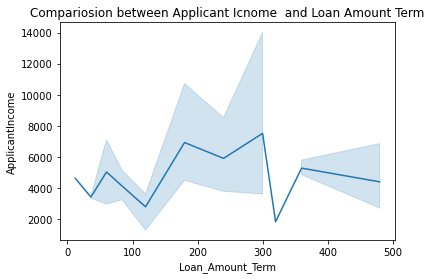

In [45]:
#let us plot Applicant income and co applicant income 
sns.lineplot(x="Loan_Amount_Term",y='ApplicantIncome',data=data,)
plt.title("Compariosion between Applicant Icnome  and Loan Amount Term")
plt.show()

As the loan_Amount_Term vary with income, for high income tenure is low and low income tenure is high

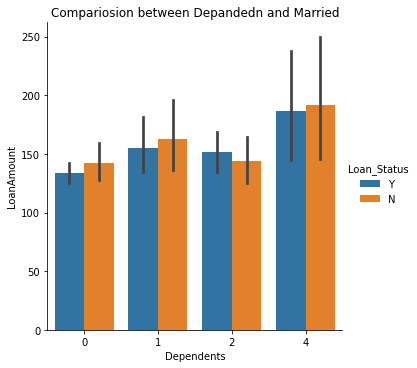

In [61]:
# Checking relation between LoanAmount and Depandent on the basis of target
sns.catplot(x="Dependents",y='LoanAmount',data=data,kind="bar",hue="Loan_Status")
plt.title("Compariosion between Dependents and Loan Amount")
plt.show()

We can find that dependents increase chances of rejection also increase according to loan maount

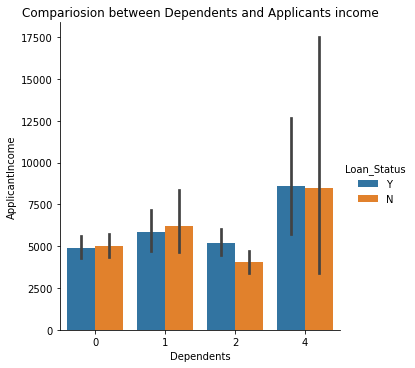

In [70]:
# Checking relation between Applicant Income and Depandent on the basis of target
sns.factorplot(x="Dependents",y='ApplicantIncome',data=data,kind="bar",hue="Loan_Status")
plt.title("Compariosion between Dependents and Applicants income")
plt.show()

As dependents increase the income should increase as for sanctioning loan

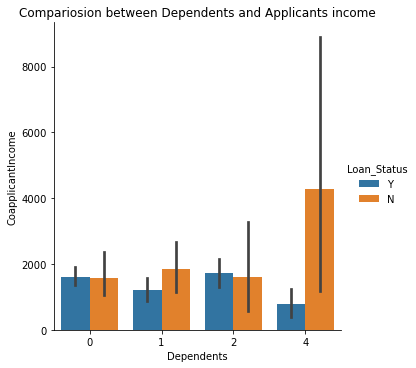

In [71]:
# Checking relation between Co-Applicant Income and Depandent on the basis of target
sns.factorplot(x="Dependents",y='CoapplicantIncome',data=data,kind="bar",hue="Loan_Status")
plt.title("Compariosion between Dependents and CoApplicants income")
plt.show()

As we noticed rejection of high depended we can find from here

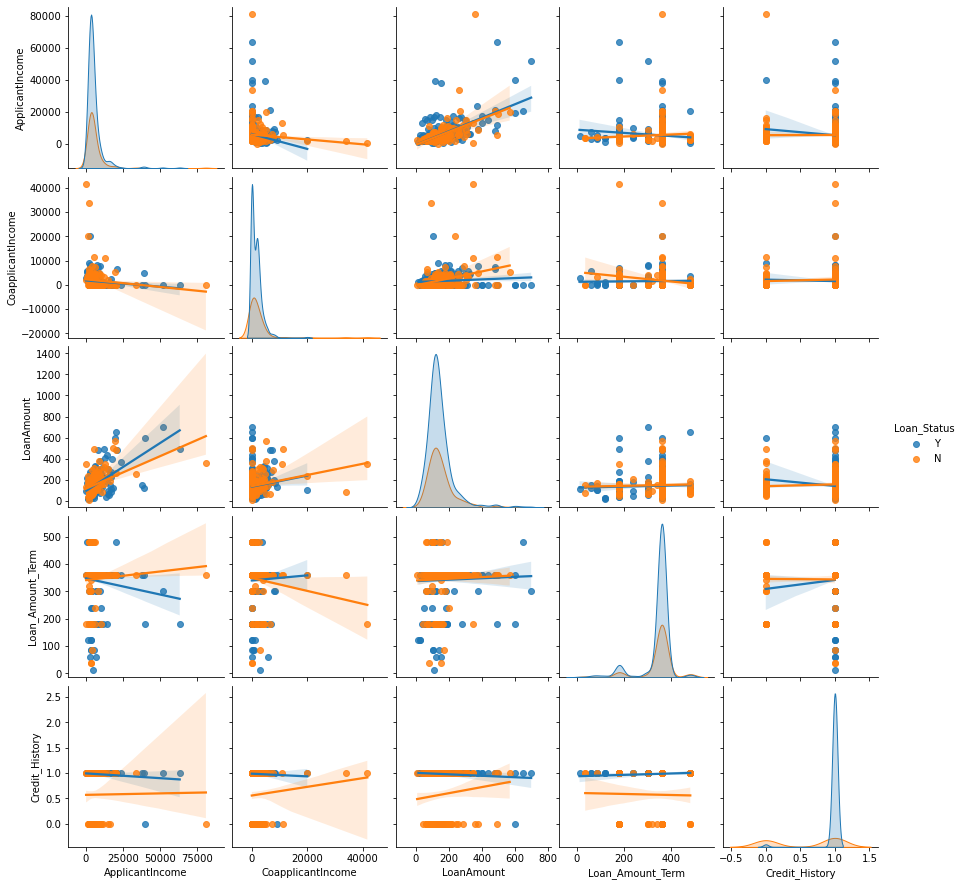

In [74]:
#Now We will identify the multivarient analysis
sns.pairplot(data=data,hue='Loan_Status',kind='reg')
plt.show()

We can observe the linear relationship between ApplicantIncome and LoanAmount, CoapplicantIncome and LoanAmount, ApplicantIncome and TotalIncome.



# Conclusion

We find some linear relation between features,
Most of the coloums were catagorical,


# Outliers Removal

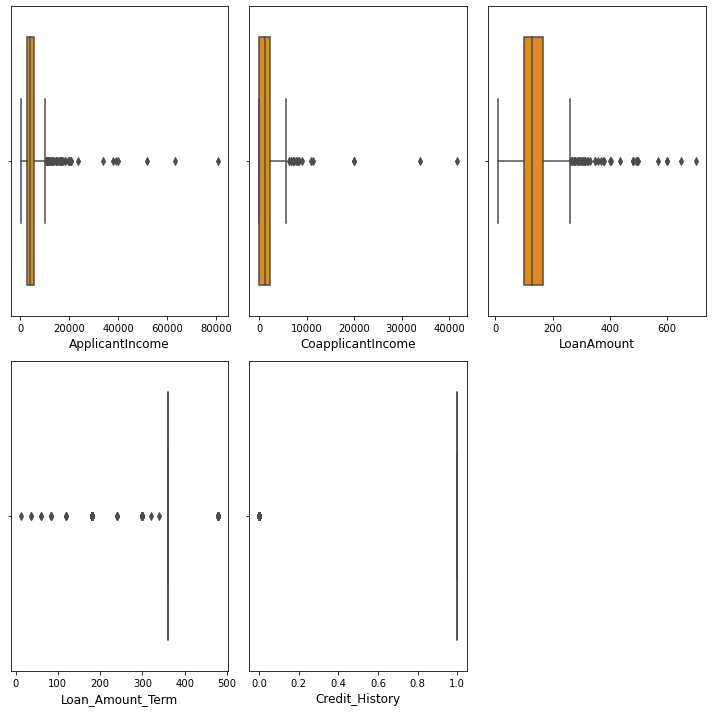

In [80]:
# Identifying the outliers present in numerical columns using boxplo

plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(data[column],color="darkorange")
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

We can observe the outliers present in all the columns. But the columns Credit history has only two unique values so no need to remove outliers in this column. Let's remove outliers in remaining columns them using Zscore method.

# Zscore method

In [81]:
# numerical columns containing outliers
features = data[ numerical_col]

# Using Zscore method to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(features))

z

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.072991,0.554487,0.041791,0.279069,0.411733
1,0.134412,0.038732,0.218530,0.279069,0.411733
2,0.393747,0.554487,0.954663,0.279069,0.411733
3,0.462062,0.251980,0.313515,0.279069,0.411733
4,0.097728,0.554487,0.064180,0.279069,0.411733
...,...,...,...,...,...
609,0.410130,0.554487,0.895297,0.279069,0.411733
610,0.212557,0.554487,1.263363,2.514658,0.411733
611,0.437174,0.472404,1.265608,0.279069,0.411733
612,0.357064,0.554487,0.481983,0.279069,0.411733


In [82]:
# Creating new dataframe
new_df = data[(z<3).all(axis=1)] 
new_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,149.925313,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,4,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [84]:
# % of data loss
data.shape

(614, 12)

In [85]:
new_df.shape

(577, 12)

In [86]:
(614-577)/614*100

6.026058631921824

So data loss is 6 % that is acceptable

# Checking for skewness

In [87]:
new_df.skew()

Dependents           1.500252
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.116461
Loan_Amount_Term    -2.065152
Credit_History      -1.976043
dtype: float64

All feild contains skewness

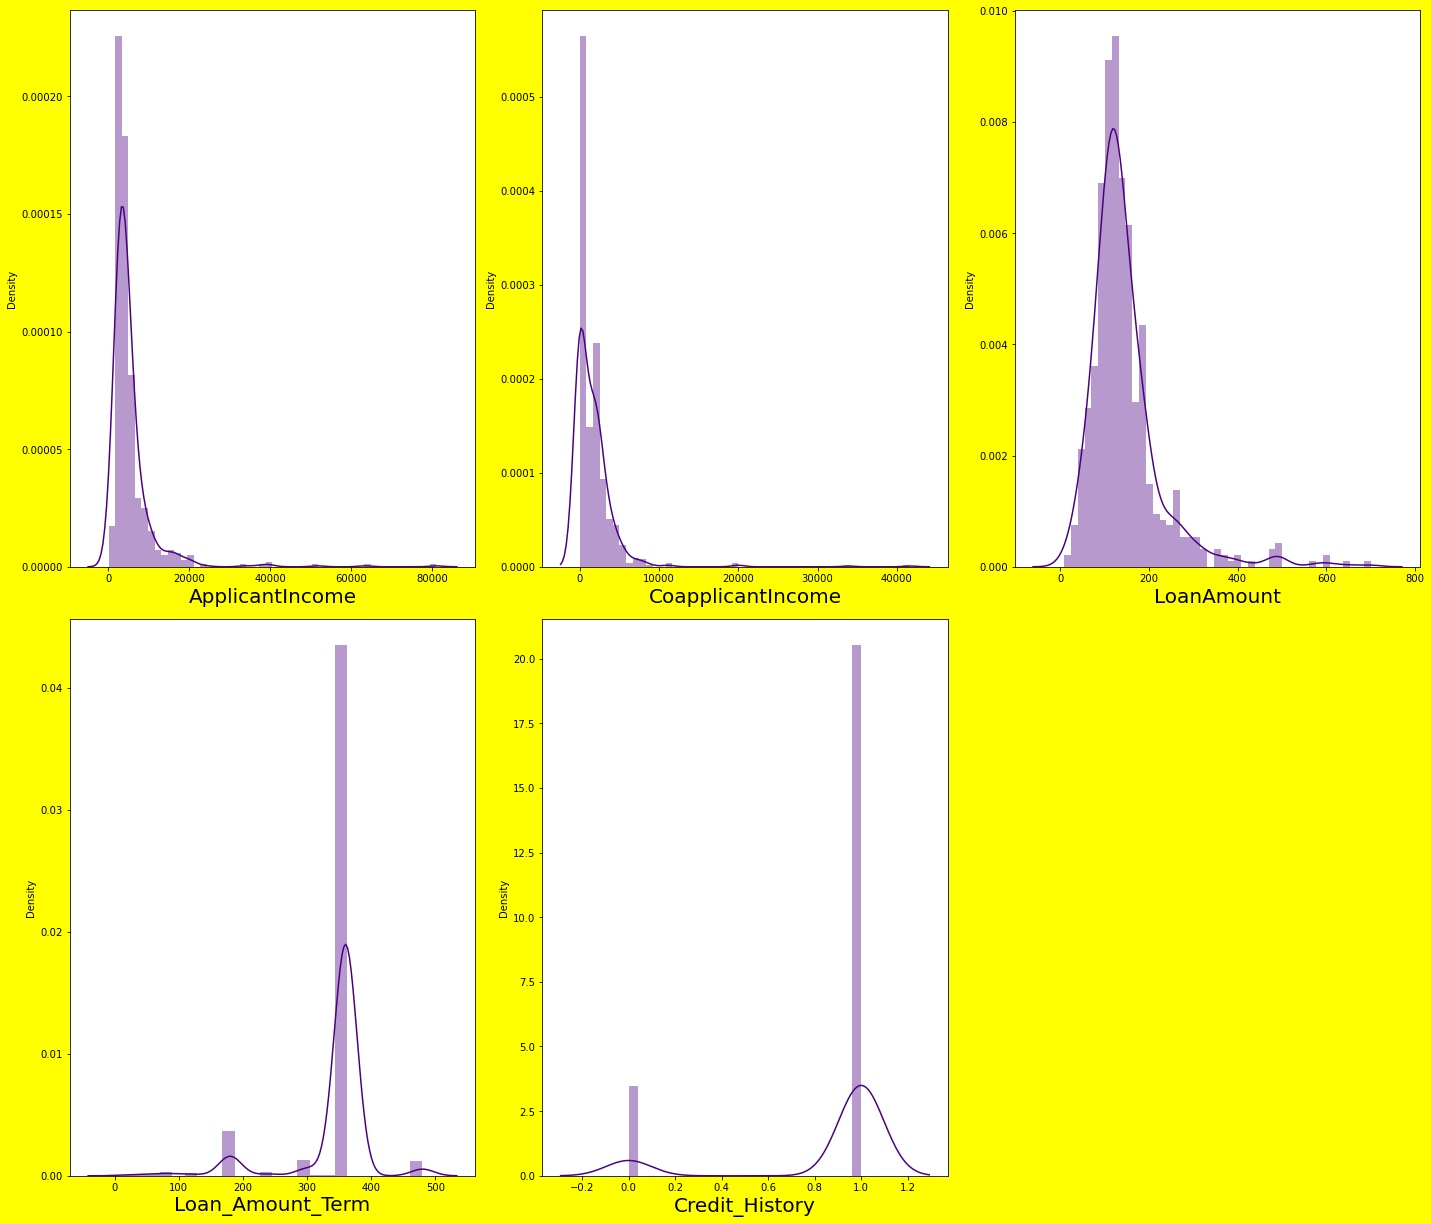

In [90]:
# Let Us visualize the skewness
plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column],color="indigo")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

From the above distribution plot we can observe

The data is not normally distributed in any of the columns.

We have to remove skewness except Dependents as it is Catagorical 

# Removing Skewness using yeo-johnson method

In [92]:
# Removing skewness using yeo-johnson  method to get better prediction
skew = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
        
new_df[skew] = scaler.fit_transform(new_df[skew].values)
new_df[skew].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0.681780,-1.122446,0.378245,0.140414
1,0.234783,0.744117,-0.011464,0.140414
2,-0.527201,-1.122446,-1.437324,0.140414
3,-0.791972,0.895786,-0.164726,0.140414
4,0.728848,-1.122446,0.224515,0.140414


In [93]:
#let us check again
new_df.skew()

Dependents           1.500252
ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.045579
Loan_Amount_Term     0.707192
Credit_History      -1.976043
dtype: float64

So skewness reduced, let us visualize the same

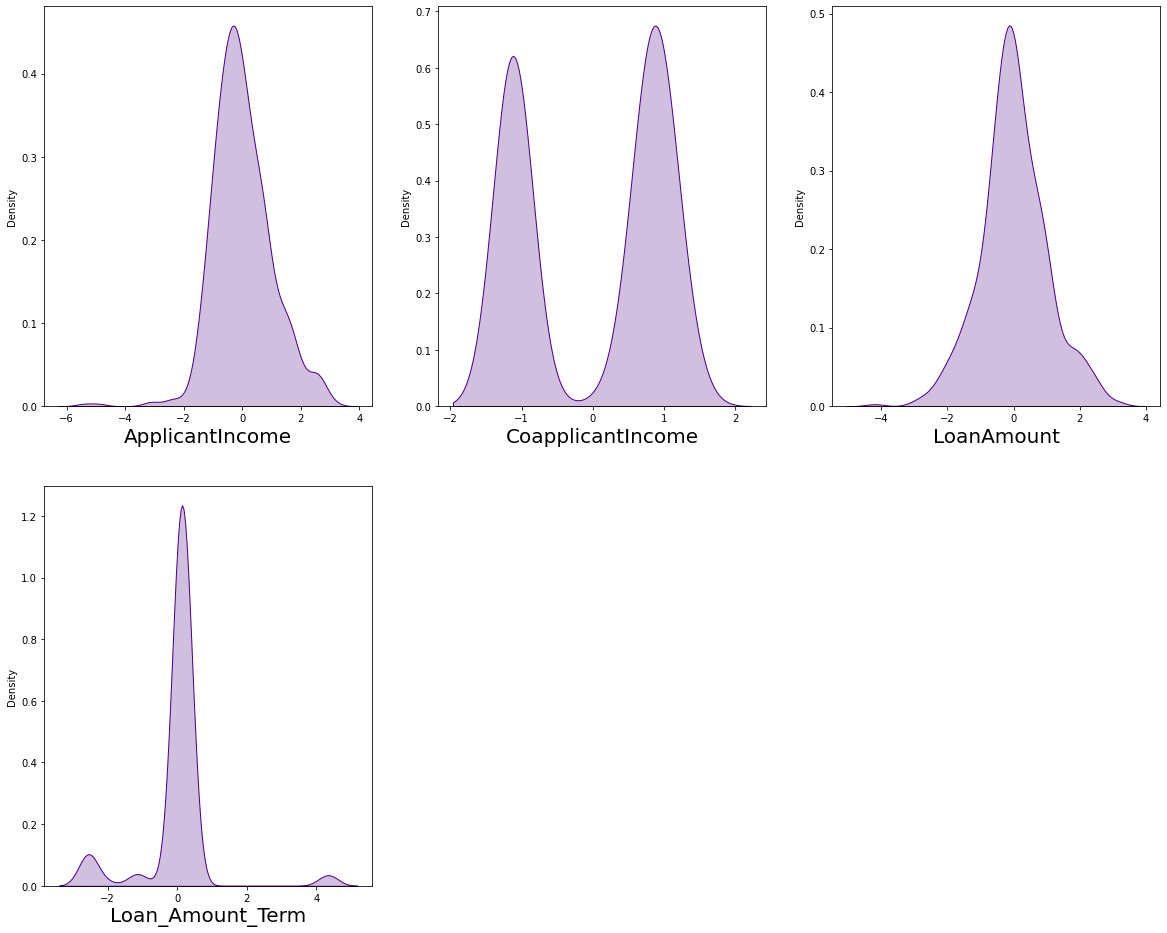

In [96]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in new_df[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(new_df[column],color='indigo',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

From this figures we can easily undestand that skewness reduced much

# Encoding the categorical columns using Label Encoding

In [98]:
categorical_col = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df[categorical_col]= new_df[categorical_col].apply(LE.fit_transform)
#Encoding the categorical columns using label encoder.

new_df[categorical_col]

,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
0,1,0,0,0,2,1
1,1,1,0,0,0,0
2,1,1,0,1,2,1
3,1,1,1,0,2,1
4,1,0,0,0,2,1
...,...,...,...,...,...,...
609,0,0,0,0,0,1
610,1,1,0,0,0,1
611,1,1,0,0,2,1
612,1,1,0,0,2,1


# Correlation between the target variable and independent variables using HEAT map

In [99]:
# Checking the correlation between features and the target
cor = new_df.corr()
cor

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.378997,0.045696,-0.006207,0.058590,0.234551,0.170234,-0.102450,0.013172,-0.026340,0.017408
Married,0.378997,1.000000,0.024817,-0.015779,-0.024783,0.335820,0.183178,-0.134655,0.019308,0.010595,0.089026
Education,0.045696,0.024817,1.000000,-0.007139,-0.176074,0.049739,-0.135452,-0.059572,-0.075217,-0.068596,-0.092658
Self_Employed,-0.006207,-0.015779,-0.007139,1.000000,0.212260,-0.087338,0.117446,-0.048210,-0.016390,-0.028253,-0.026525
ApplicantIncome,0.058590,-0.024783,-0.176074,0.212260,1.000000,-0.360946,0.453507,-0.087045,0.028825,-0.011364,-0.002484
CoapplicantIncome,0.234551,0.335820,0.049739,-0.087338,-0.360946,1.000000,0.186872,-0.008221,0.006564,-0.074476,0.079344
LoanAmount,0.170234,0.183178,-0.135452,0.117446,0.453507,0.186872,1.000000,0.016928,-0.001589,-0.100434,-0.027965
Loan_Amount_Term,-0.102450,-0.134655,-0.059572,-0.048210,-0.087045,-0.008221,0.016928,1.000000,0.003077,-0.030652,-0.056976
Credit_History,0.013172,0.019308,-0.075217,-0.016390,0.028825,0.006564,-0.001589,0.003077,1.000000,-0.008121,0.560936
Property_Area,-0.026340,0.010595,-0.068596,-0.028253,-0.011364,-0.074476,-0.100434,-0.030652,-0.008121,1.000000,0.026507


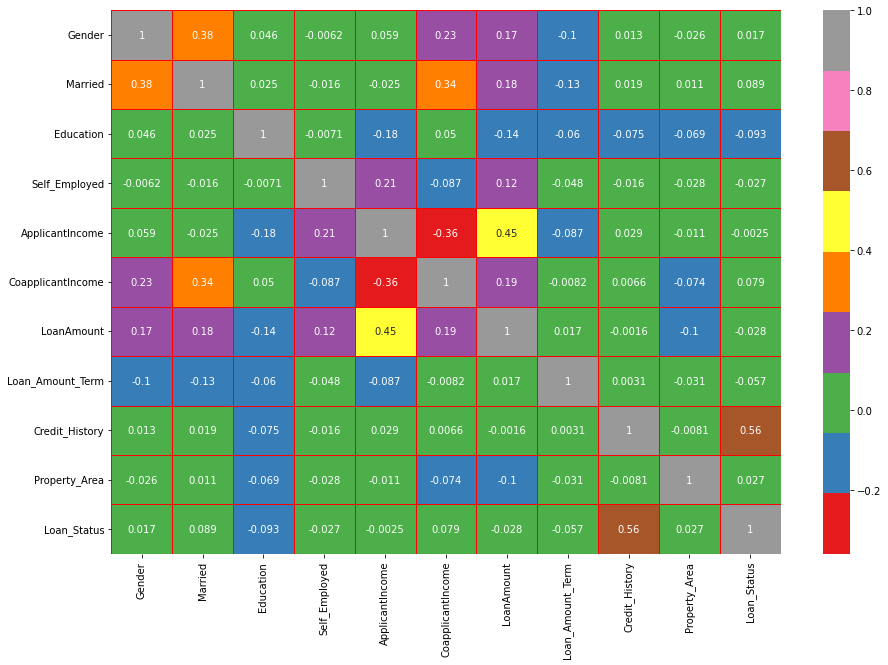

In [105]:
# Visualize the Corelation
plt.figure(figsize=(15,10))
sns.heatmap(cor,annot=True,cmap='Set1',linewidths=.5,linecolor='red')
plt.show()

This heatmap shows the correlation matrix by visualizing the data. we can observe the relation between one feature to other.

-This heat mapcontains both positive and negative correlation.

The target column Loan_Status is highly positively correlated with the feature Credit_History.

The other features have very less correlation with the target column.

Also we can notice there is no multicollinearity issue in the features. Features have moderate level of correlation with each other.

ApplicantIncome is very less correlated with the target.


In [106]:
#Let us separate the corelation with Label
cor['Loan_Status'].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.560936
Married              0.089026
CoapplicantIncome    0.079344
Property_Area        0.026507
Gender               0.017408
ApplicantIncome     -0.002484
Self_Employed       -0.026525
LoanAmount          -0.027965
Loan_Amount_Term    -0.056976
Education           -0.092658
Name: Loan_Status, dtype: float64

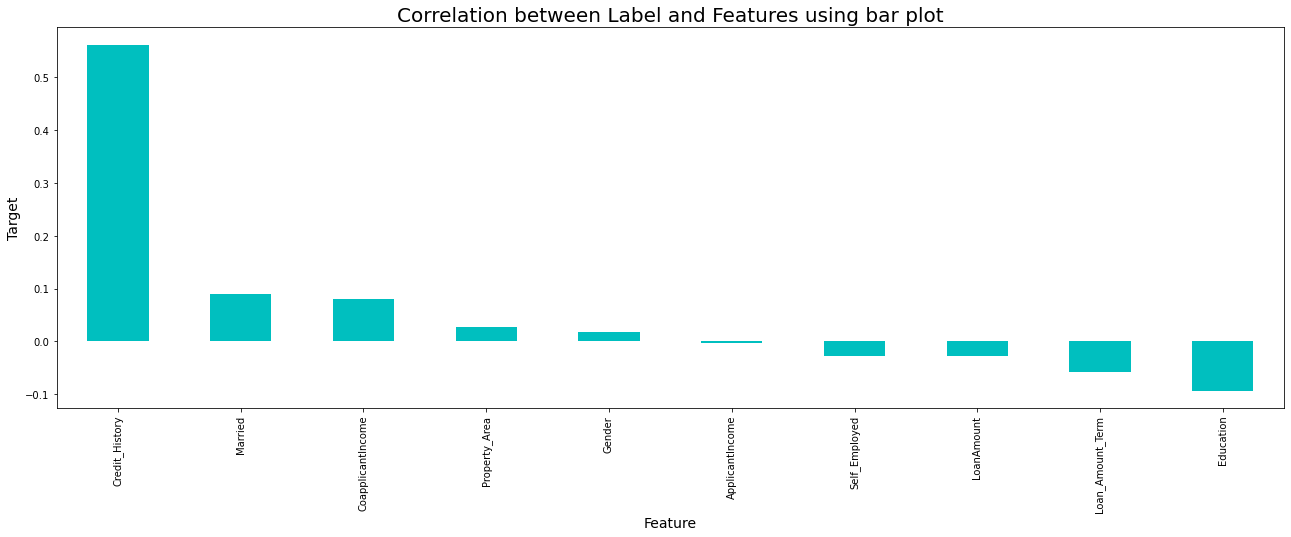

In [108]:
#Visualize that 
plt.figure(figsize=(22,7))
new_df.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation between Label and Features using bar plot',fontsize=20)
plt.show()

Applicantincome very less relation with Label, we can either remove or it or keep it

# Separating the features and label variables into x and y

In [109]:
x = new_df.drop("Loan_Status", axis=1)
y = new_df["Loan_Status"]

# Feature Scaling using Standard Scaler

In [110]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.477137,-1.362511,-0.670628,-0.541961,-0.380580,0.681780,-1.122446,0.378245,0.140414,0.418513,1.227472
1,0.477137,0.733939,0.172406,-0.541961,-0.380580,0.234783,0.744117,-0.011464,0.140414,0.418513,-1.306522
2,0.477137,0.733939,-0.670628,-0.541961,2.627567,-0.527201,-1.122446,-1.437324,0.140414,0.418513,1.227472
3,0.477137,0.733939,-0.670628,1.845150,-0.380580,-0.791972,0.895786,-0.164726,0.140414,0.418513,1.227472
4,0.477137,-1.362511,-0.670628,-0.541961,-0.380580,0.728848,-1.122446,0.224515,0.140414,0.418513,1.227472
...,...,...,...,...,...,...,...,...,...,...,...
572,-2.095835,-1.362511,-0.670628,-0.541961,-0.380580,-0.587375,-1.122446,-1.295259,0.140414,0.418513,-1.306522
573,0.477137,0.733939,2.701508,-0.541961,-0.380580,0.035386,-1.122446,-2.321997,-2.550576,0.418513,-1.306522
574,0.477137,0.733939,0.172406,-0.541961,-0.380580,1.281658,0.173344,1.824372,0.140414,0.418513,1.227472
575,0.477137,0.733939,1.015440,-0.541961,-0.380580,1.164426,-1.122446,0.958452,0.140414,0.418513,1.227472


In [111]:
# Let us check the count of our Label
y.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

So we need to do sampling techniques to make or Label equaly distributed

#  Oversampling

In [112]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [113]:
y.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

# Modeling

In [163]:
#Finding best random state
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    DTC = RandomForestClassifier()
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.891213389121339  on Random_state  112


The best accuracy is 89.12 on the Random state 112.

In [175]:
#Creating train_test split at best Randomstate
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=112)

# Classification Algorithms

In [165]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
# Evaluation Techniques
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.metrics import plot_roc_curve

# Random Forest Classifier

In [191]:
# Checking accuracy for Random Forest Classifier
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)

# Prediction
predRFC = RFC.predict(x_test)

print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test,predRFC))

0.8702928870292888
[[ 93  16]
 [ 15 115]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       109
           1       0.88      0.88      0.88       130

    accuracy                           0.87       239
   macro avg       0.87      0.87      0.87       239
weighted avg       0.87      0.87      0.87       239



# Decision Tree Classifier

In [193]:
# Checking Accuracy for Decision Tree Classifier
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)

#Prediction
predDTC = DTC.predict(x_test)

print(accuracy_score(y_test, predDTC))
print(confusion_matrix(y_test, predDTC))
print(classification_report(y_test,predDTC))

0.7489539748953975
[[88 21]
 [39 91]]
              precision    recall  f1-score   support

           0       0.69      0.81      0.75       109
           1       0.81      0.70      0.75       130

    accuracy                           0.75       239
   macro avg       0.75      0.75      0.75       239
weighted avg       0.76      0.75      0.75       239



The accuracy using Decision Tree Classifier is 75.50%

# Logistic Regression

In [194]:
# Checking accuracy for Logistic Regression Classifier
LR = LogisticRegression()
LR.fit(x_train,y_train)

# Prediction
predLR = LR.predict(x_test)

print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test,predLR))

0.7949790794979079
[[ 66  43]
 [  6 124]]
              precision    recall  f1-score   support

           0       0.92      0.61      0.73       109
           1       0.74      0.95      0.84       130

    accuracy                           0.79       239
   macro avg       0.83      0.78      0.78       239
weighted avg       0.82      0.79      0.79       239



Accuracy score for Logistic Regression is 79.50%

# Support Vector Machine Classifier

In [195]:
# Checking accuracy for Support Vector Machine Classifier
svc = SVC()
svc.fit(x_train,y_train)

# Prediction
predsvc = svc.predict(x_test)

print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))

0.7615062761506276
[[ 66  43]
 [ 14 116]]
              precision    recall  f1-score   support

           0       0.82      0.61      0.70       109
           1       0.73      0.89      0.80       130

    accuracy                           0.76       239
   macro avg       0.78      0.75      0.75       239
weighted avg       0.77      0.76      0.76       239



Accuracy score of SVC is 76.55%

# KNeighbors Classifier

In [196]:
# Checking accuracy for KNeighbors Classifier
knn = KNN()
knn.fit(x_train,y_train)

# Prediction
predknn = knn.predict(x_test)

print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test,predknn))

0.7531380753138075
[[85 24]
 [35 95]]
              precision    recall  f1-score   support

           0       0.71      0.78      0.74       109
           1       0.80      0.73      0.76       130

    accuracy                           0.75       239
   macro avg       0.75      0.76      0.75       239
weighted avg       0.76      0.75      0.75       239



Accuracy Score for Kneighbors Classifier is 75.31%

 # Gradient Boosting Classifier

In [197]:
# Checking accuracy for Gradient Boosting Classifier
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)

# Prediction
predGB = GB.predict(x_test)

print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test,predGB))

0.8284518828451883
[[ 82  27]
 [ 14 116]]
              precision    recall  f1-score   support

           0       0.85      0.75      0.80       109
           1       0.81      0.89      0.85       130

    accuracy                           0.83       239
   macro avg       0.83      0.82      0.82       239
weighted avg       0.83      0.83      0.83       239



Accuracy Score for Gradient Boosting Classifier: 82.85%

# AdaBoost Classifier

In [198]:
# Checking accuracy for AdaBoost Classifier
ABC = AdaBoostClassifier()
ABC.fit(x_train,y_train)

# Prediction
predABC = ABC.predict(x_test)

print(accuracy_score(y_test, predABC))
print(confusion_matrix(y_test, predABC))
print(classification_report(y_test,predABC))

0.7782426778242678
[[ 82  27]
 [ 26 104]]
              precision    recall  f1-score   support

           0       0.76      0.75      0.76       109
           1       0.79      0.80      0.80       130

    accuracy                           0.78       239
   macro avg       0.78      0.78      0.78       239
weighted avg       0.78      0.78      0.78       239



Accuracy score for AdaBoost Classifier is 77.83%

# Plot ROC AUC Curve

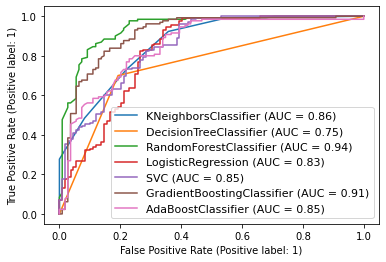

In [199]:
disp = plot_roc_curve(knn,x_test,y_test)
plot_roc_curve(DTC, x_test, y_test, ax=disp.ax_)     # ax_=Axes with confusion matrix
plot_roc_curve(RFC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(LR, x_test, y_test, ax=disp.ax_)
plot_roc_curve(svc, x_test, y_test, ax=disp.ax_)
plot_roc_curve(GB, x_test, y_test, ax=disp.ax_)
plot_roc_curve(ABC, x_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')
plt.show()

From ROC curve we can identify that Random Forest and GBC is the best alogorithm with great accuracy, lets find croos validation score and verify the best model

# Cross Validation

In [200]:
from sklearn.model_selection import cross_val_score
# cv score for Decision Tree Classifier
print(cross_val_score(DTC,x,y,cv=5).mean())

0.7551022012578616


In [201]:
# cv score for Random Forest Classifier
print(cross_val_score(RFC,x,y,cv=5).mean())

0.8216666666666667


In [202]:
# cv score for Logistic Regression Classifier
print(cross_val_score(LR,x,y,cv=5).mean())

0.7048034591194969


In [203]:
# cv score for Support Vector Machine Classifier
print(cross_val_score(svc,x,y,cv=5).mean())

0.7173427672955974


In [204]:
# cv score for KNN Classifier
print(cross_val_score(knn,x,y,cv=5).mean())

0.7387028301886792


In [205]:
# cv score for Gradient Boosting Classifier
print(cross_val_score(GB,x,y,cv=5).mean())


0.7727122641509434


In [206]:
# cv score for AdaBoosting Classifier
print(cross_val_score(ABC,x,y,cv=5).mean())

0.7500471698113207


While checking the cross validation score the least differance is for KNneighbor Classifier is the best one, So we select Knn as our Model

# Hyper Parameter Tuning

In [154]:
from sklearn.model_selection import GridSearchCV

In [213]:
#parameter for knn
parameters = {'n_neighbors':[2,3,4,5,6],
              'algorithm':['auto','ball_tree', 'kd_tree', 'brute'],
              'leaf_size':[10,2,60,40,50],
              'weights':['uniform','distance'],
              'p':[1,2,6,4,5]}

GVC=GridSearchCV(KNN(),parameters,cv=5)

In [214]:
GVC.fit(x_train,y_train)# training model

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 2, 60, 40, 50],
                         'n_neighbors': [2, 3, 4, 5, 6], 'p': [1, 2, 6, 4, 5],
                         'weights': ['uniform', 'distance']})

In [216]:
GVC.best_params_ # Best parameters

{'algorithm': 'auto',
 'leaf_size': 10,
 'n_neighbors': 3,
 'p': 1,
 'weights': 'distance'}

In [217]:
#loading Best Parameters in model
Loan_Model = KNN(algorithm='auto', leaf_size=10, n_neighbors=3, weights='distance',p=1)
Loan_Model.fit(x_train, y_train)
pred = Loan_Model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

83.68200836820083


Accuracy of our model increased and is the best alogorithm

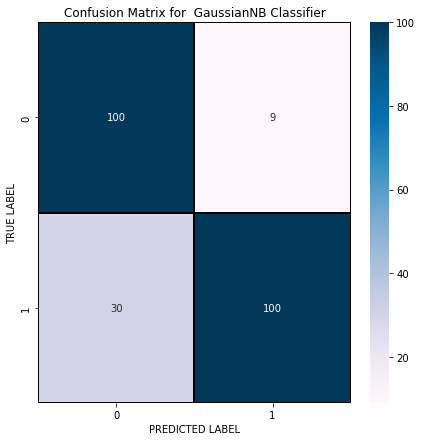

In [231]:
# Lets plot confusion matrix for  Our Model
cm = confusion_matrix(y_test,pred)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="PuBu")

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  GaussianNB Classifier')
plt.show()

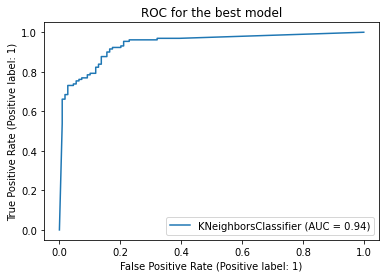

In [219]:
# Let's check the Auc for the best model after hyper parameter tuning
plot_roc_curve(Loan_Model, x_test, y_test)
plt.title("ROC for the best model")
plt.show()

# Saving the model

In [220]:
# Saving the model using .pkl
import joblib
joblib.dump(Loan_Model,"LoanApplicationStatus.pkl")

['LoanApplicationStatus.pkl']

# Loading Saved Model

In [221]:
# Loading the saved model
model=joblib.load("LoanApplicationStatus.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1])

In [227]:
#let us make a Data Frame for the same
a=np.array(y_test)
df_final = pd.DataFrame({"Original":a,"Predicted":prediction},index=range(len(a)))
df_final

,Original,Predicted
0,0,0
1,1,1
2,0,0
3,0,0
4,1,1
...,...,...
234,1,1
235,1,1
236,1,1
237,1,1


# Concluding Remarks
We achieved the objective of this project to build a model which predicts whether the applicant's loan will be approved or rejected. Based on customer details like, Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others, our model will identify the customers segments, those are eligible for loan amount.
